In [ ]:
import os
import collections
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from statistics import mean



PRECISION = 0.001

SYSTEMS = ['popper_acc', 'popper_accminsize', 'popper_lexfn', 'popper_lexfnsize', 'popper_lexfp', 'popper_lexfpsize', 'popper_mdl']

TRIALS = [i for i in range(2)]
STEP_NPROGS = 1000
MAX_NPROGS = 80000


def std_err(lst):
    data = np.array(lst)
    return np.std(data, ddof=1) / np.sqrt(np.size(data))


def read_results(result_file):
    with open(result_file, 'r') as f:
        for line in f.readlines():
            if line.startswith('accuracy:'):
                acc = float(line.split(':')[1])
    return acc

#this is for dic with structure [data[sys][task]['key']]
def read_data(DOMAIN,TASKS):
    data_accuracy = collections.defaultdict(lambda: collections.defaultdict(lambda: collections.defaultdict(list)))
    stats = collections.defaultdict(lambda: collections.defaultdict(lambda: collections.defaultdict(dict)))
    for sys in SYSTEMS:
        for task in TASKS:
            for trial in TRIALS:
                print(sys, task, trial)
                output_path = os.path.join('/content/drive/MyDrive/popper/plot_timeout/experimental_data', DOMAIN, f'{task}', sys, str(trial), "nprogs")
                print(output_path)
                dirs = os.listdir(output_path)
                n_progs = sorted([int(d.split(".")[0]) for d in dirs if not d.startswith('.')])
                k, current_key = 0, 0
                while k < MAX_NPROGS:
                    if n_progs[current_key] < k and current_key < len(n_progs) - 1:
                        current_key += 1
                    data_accuracy[sys][task][k].append(read_results(os.path.join(output_path, f"{n_progs[current_key]}.pl")))
                    k += STEP_NPROGS
                    if k > max(n_progs):
                      print(current_key, len(n_progs),n_progs)
                      break  # Break the loop if no further data is available
            acc_av, acc_sem = [], []
            for k in data_accuracy[sys][task]:
                acc_av.append(mean(data_accuracy[sys][task][k]))
                acc_sem.append(std_err(data_accuracy[sys][task][k]))
            stats[sys][task]['timeout'] = sorted(data_accuracy[sys][task].keys())
            stats[sys][task]['acc_av'] = acc_av
            stats[sys][task]['acc_sem'] = acc_sem
    return stats


def load_data(domain, noise_levels, prefixes):
    all_data = []
    for noise_level in noise_levels:
        tasks = [f"{prefix}__{noise_level}" for prefix in prefixes]
        data = read_data(domain, tasks)
        all_data.append(data)
    return all_data

#THIS function is stats but with structure data[sys]['key']
def read_data_domain_av(DOMAIN,TASKS):
    data_accuracy = collections.defaultdict(lambda: collections.defaultdict(list))
    stats = collections.defaultdict(lambda: collections.defaultdict(dict))
    for sys in SYSTEMS:
        for task in TASKS:
            for trial in TRIALS:
                print(sys, task, trial)
                output_path = os.path.join('/content/drive/MyDrive/popper/plot_timeout/experimental_data', DOMAIN, f'{task}', sys, str(trial), "nprogs")
                print(output_path)
                dirs = os.listdir(output_path)
                n_progs = sorted([int(d.split(".")[0]) for d in dirs if not d.startswith('.')])
                k, current_key = 0, 0
                while k < MAX_NPROGS:
                    if n_progs[current_key] < k and current_key < len(n_progs)-1:
                        current_key += 1
                    data_accuracy[sys][k].append(read_results(os.path.join(output_path, f"{n_progs[current_key]}.pl")))
                    k += STEP_NPROGS
        acc_av, acc_sem = [], []
        for k in data_accuracy[sys]:
            acc_av.append(mean(data_accuracy[sys][k]))
            acc_sem.append(std_err(data_accuracy[sys][k]))
        stats[sys]['timeout'] = sorted(data_accuracy[sys].keys())
        stats[sys]['acc_av'] = acc_av
        stats[sys]['acc_sem'] = acc_sem
    return stats

def load_data_av(domain, noise_levels, prefixes):
    all_data = []
    for noise_level in noise_levels:
        tasks = [f"{prefix}__{noise_level}" for prefix in prefixes]
        data = read_data_domain_av(domain, tasks)
        all_data.append(data)
    return all_data



#all data_n structure: [data[sys][task]['key']]
#all data_n_ac structure: [data[sys]['key']] - which ['key'] for the average/std across tasks

data_0 = load_data('zendo', ['0'], ['zendo1', 'zendo2', 'zendo3', 'zendo4'])
data_0_av = load_data_av('zendo', ['0'], ['zendo1', 'zendo2', 'zendo3', 'zendo4'])
data_1 = load_data('zendo_noise', ['0.1'], ['zendo1', 'zendo2', 'zendo3', 'zendo4'])
data_1_av = load_data_av('zendo_noise', ['0.1'], ['zendo1', 'zendo2', 'zendo3', 'zendo4'])
data_2 = load_data('zendo_noise', ['0.2'], ['zendo1', 'zendo2', 'zendo3', 'zendo4'])
data_2_av = load_data_av('zendo_noise', ['0.2'], ['zendo1', 'zendo2', 'zendo3', 'zendo4'])

popper_acc zendo1__0 0
/content/drive/MyDrive/popper/plot_timeout/experimental_data/zendo/zendo1__0/popper_acc/0/nprogs
8 9 [0, 1, 128, 140, 156, 579, 686, 2045, 15219]
popper_acc zendo1__0 1
/content/drive/MyDrive/popper/plot_timeout/experimental_data/zendo/zendo1__0/popper_acc/1/nprogs
8 9 [0, 1, 26, 154, 212, 875, 2145, 4395, 16439]
popper_acc zendo2__0 0
/content/drive/MyDrive/popper/plot_timeout/experimental_data/zendo/zendo2__0/popper_acc/0/nprogs


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


20 21 [0, 1, 2, 123, 154, 1110, 1301, 1303, 1304, 1306, 1328, 1330, 2643, 4096, 5969, 6048, 8278, 9746, 29653, 32935, 33028]
popper_acc zendo2__0 1
/content/drive/MyDrive/popper/plot_timeout/experimental_data/zendo/zendo2__0/popper_acc/1/nprogs
19 21 [0, 1, 2, 124, 131, 211, 262, 414, 2333, 2383, 2477, 2481, 3305, 3318, 3373, 5436, 7165, 9065, 30618, 32535, 32862]
popper_acc zendo3__0 0
/content/drive/MyDrive/popper/plot_timeout/experimental_data/zendo/zendo3__0/popper_acc/0/nprogs
10 11 [0, 1, 42, 216, 303, 1233, 2151, 5799, 8386, 9740, 33784]
popper_acc zendo3__0 1
/content/drive/MyDrive/popper/plot_timeout/experimental_data/zendo/zendo3__0/popper_acc/1/nprogs
13 14 [0, 1, 5, 14, 15, 66, 131, 244, 1372, 1394, 5874, 7747, 9931, 33047]
popper_acc zendo4__0 0
/content/drive/MyDrive/popper/plot_timeout/experimental_data/zendo/zendo4__0/popper_acc/0/nprogs
8 9 [0, 1, 8, 159, 163, 830, 4227, 7152, 19641]
popper_acc zendo4__0 1
/content/drive/MyDrive/popper/plot_timeout/experimental_data/ze

This plot is for per domain (averaged tasks)

defaultdict(<function read_data_domain_av.<locals>.<lambda> at 0x7be36f3c3f40>, {'popper_acc': defaultdict(<class 'dict'>, {'timeout': [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000], 'acc_av': [50.0, 73.025, 63.9, 65.575, 68.3125, 65.29375, 70.975, 74.26875, 74.6, 76.275, 77.38125, 74.19375, 71.01875, 72.70625000000001, 71.19375, 70.8, 72.84375, 70.575, 74.1625, 70.30625, 68.98125, 72.175, 72.64375, 71.0875, 70.46875, 71.30625, 72.79375, 70.70625, 72.30625, 72.30625, 72.30625, 72.30625, 71.9937

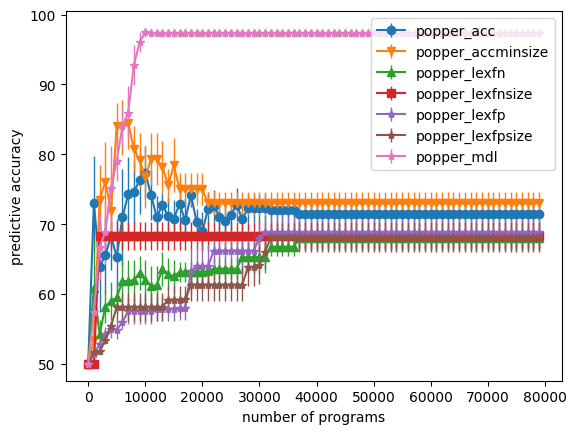

In [ ]:

def plot_results(data):
    data = data[0]
    print(data)
    filename = 'zendo'
    markers = ['o', 'v', '^', 's', '*', '*', '*', '*']
    fig, ax = plt.subplots()

    colors = list(mcolors.TABLEAU_COLORS.keys())+list(mcolors.BASE_COLORS.keys())
    for i, s in enumerate(SYSTEMS):
        #print(i,s)
        plt.errorbar(data[s]['timeout'], data[s]['acc_av'], data[s]['acc_sem'], elinewidth=1, label=f'{s}', marker=markers[i], color=colors[i])

    plt.xlabel('number of programs')
    plt.ylabel('predictive accuracy')
    plt.legend()
    # Define the path
    path = "/content/drive/MyDrive/popper/produced_plots"
    if not os.path.exists(path):
        os.makedirs(path)

    # Save the plot
    save_path = os.path.join(path, f'{filename}_0.2_noise.png')
    plt.savefig(save_path)
    plt.show()


plot_results(data_2_av)


This plot is for every task from one domain


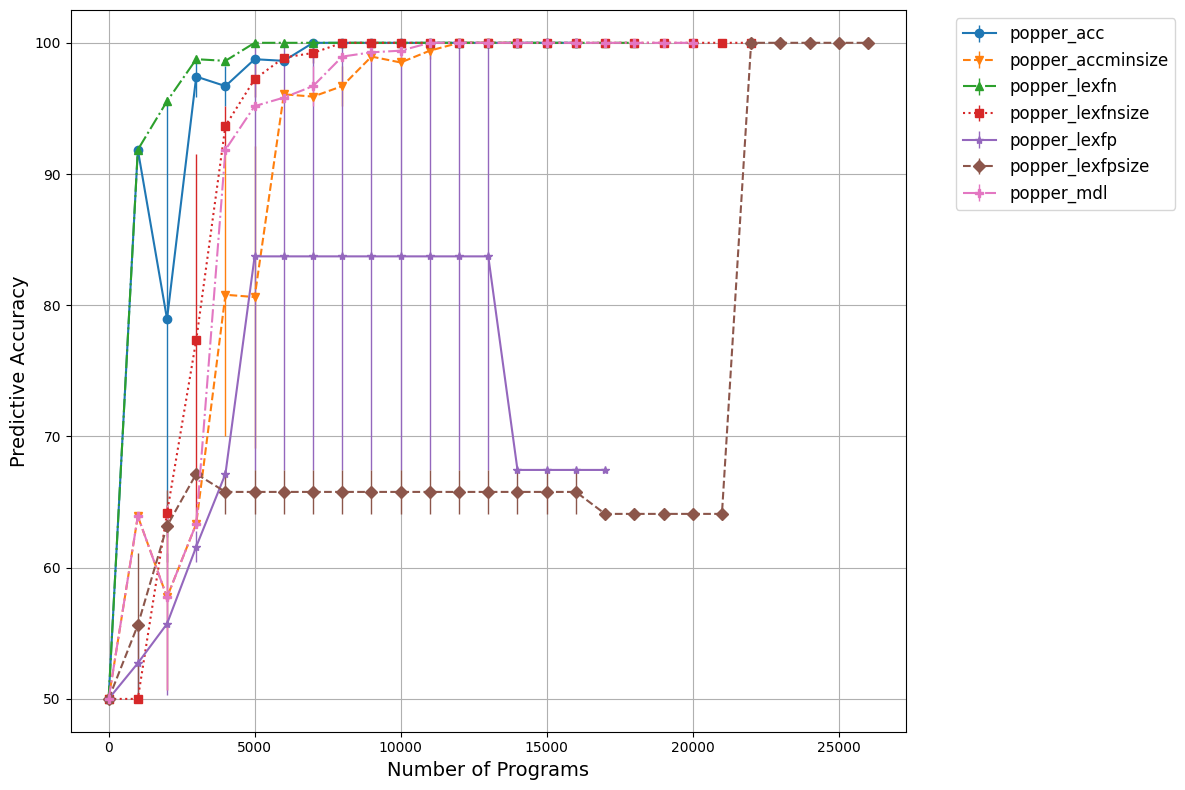

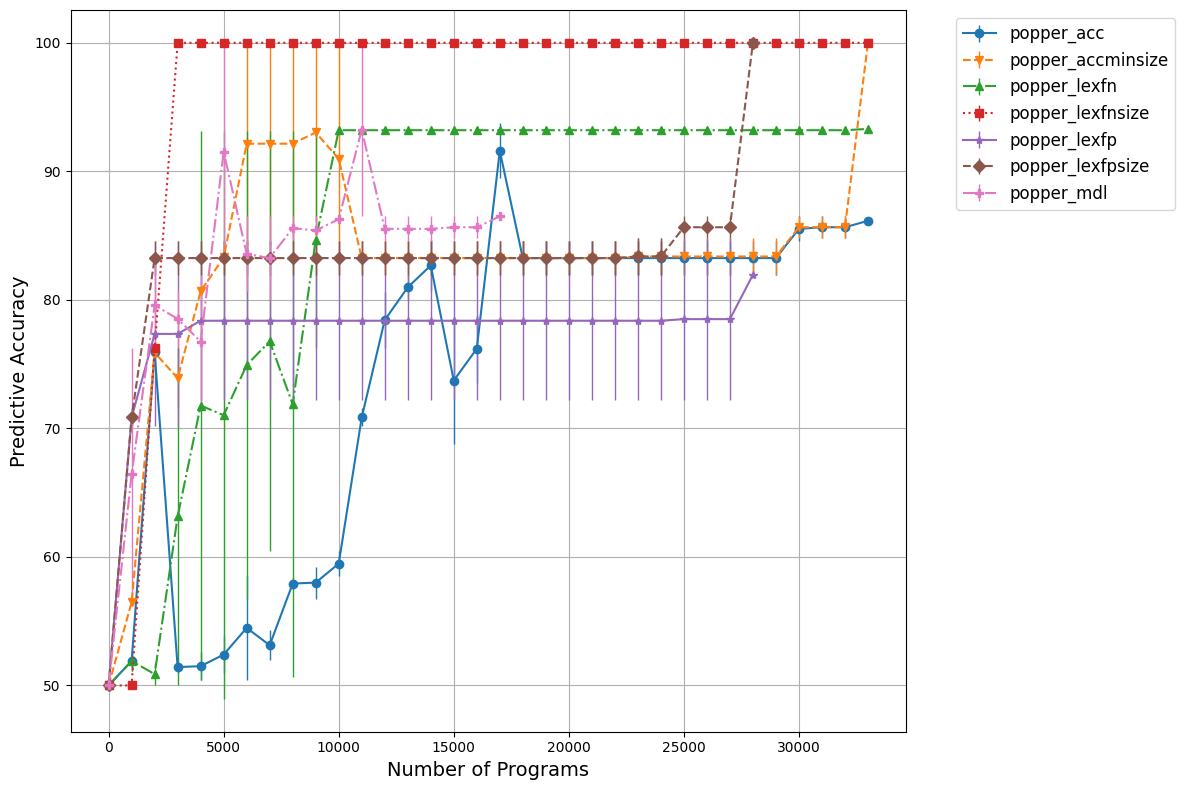

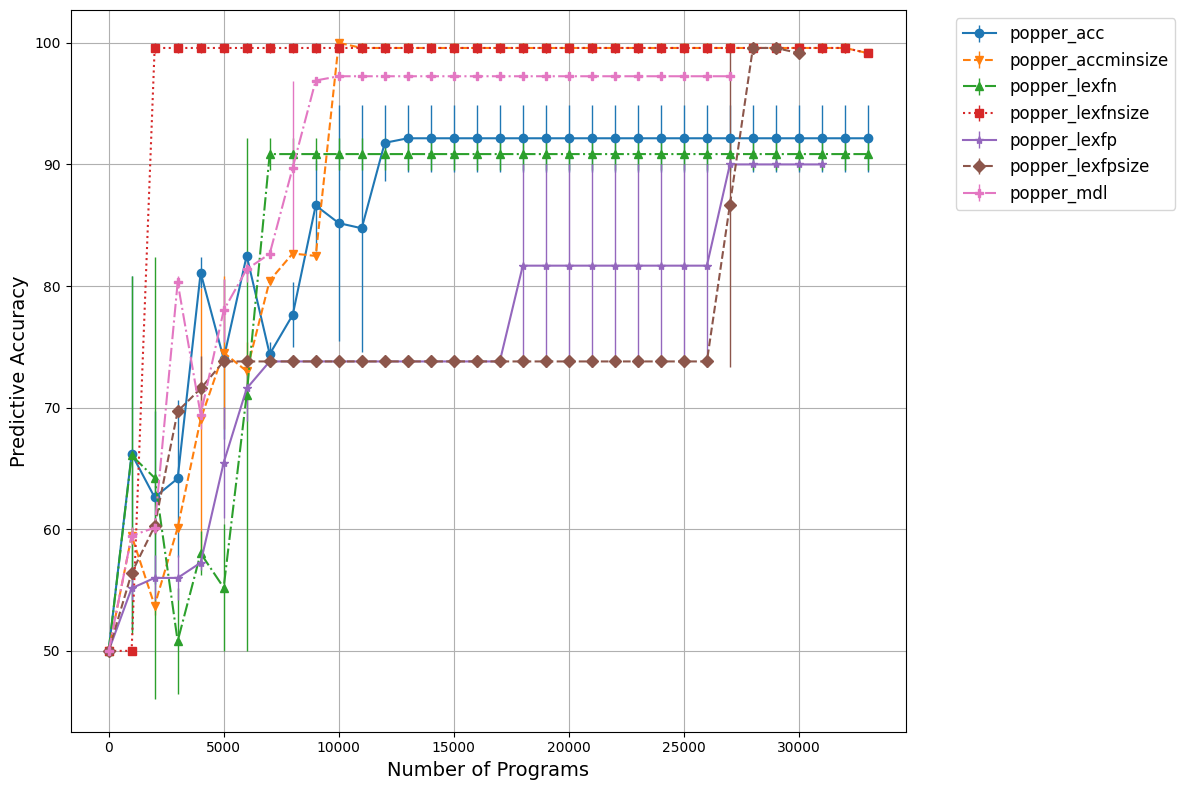

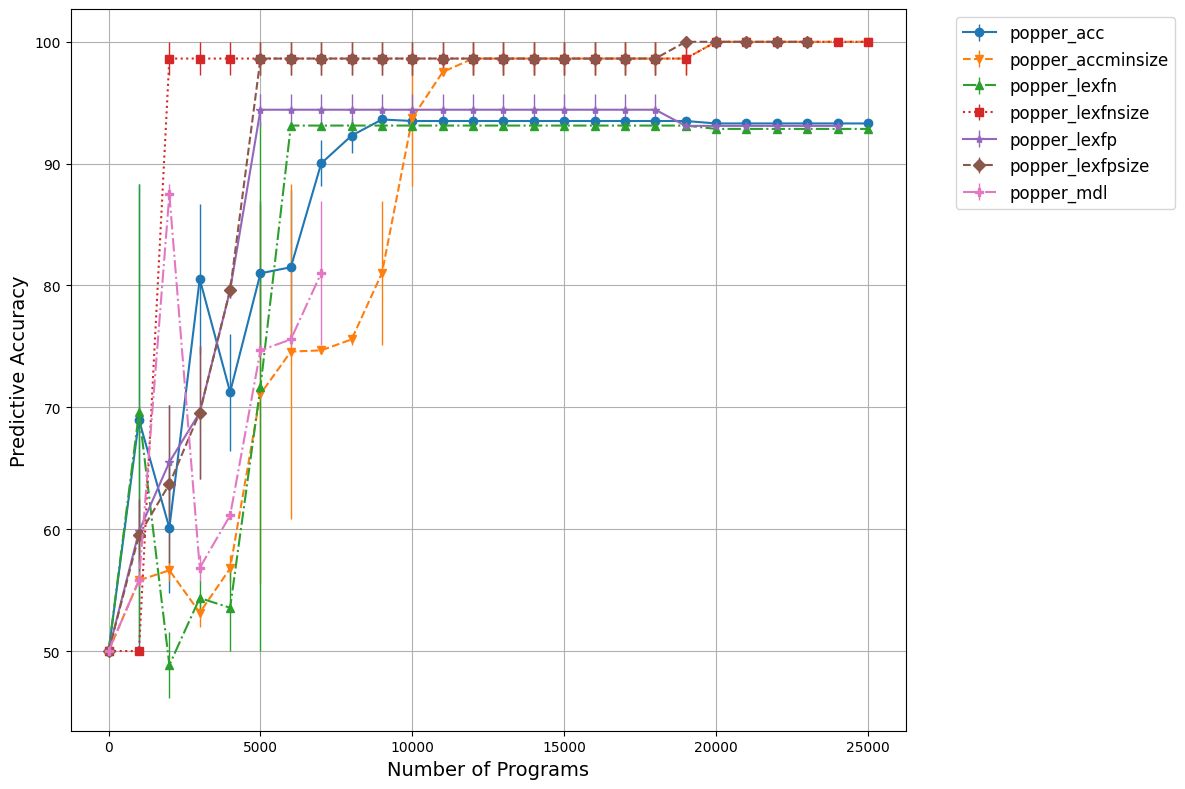

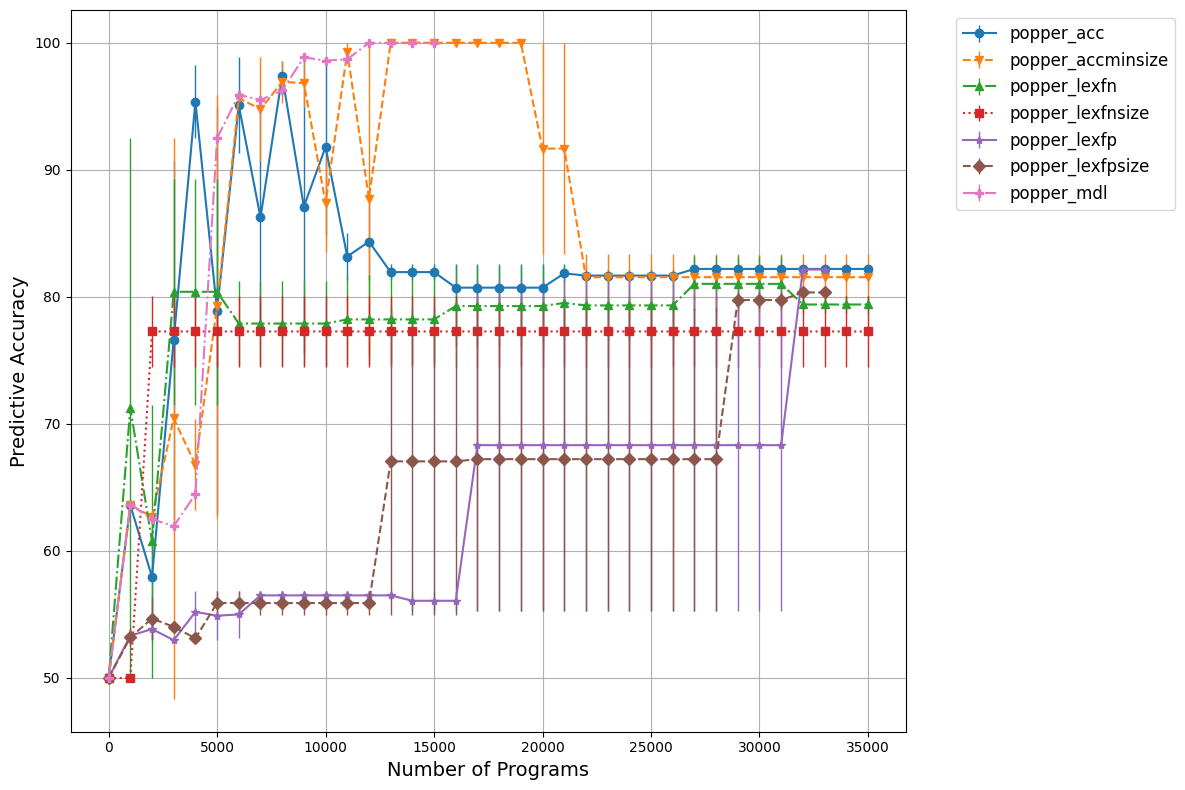

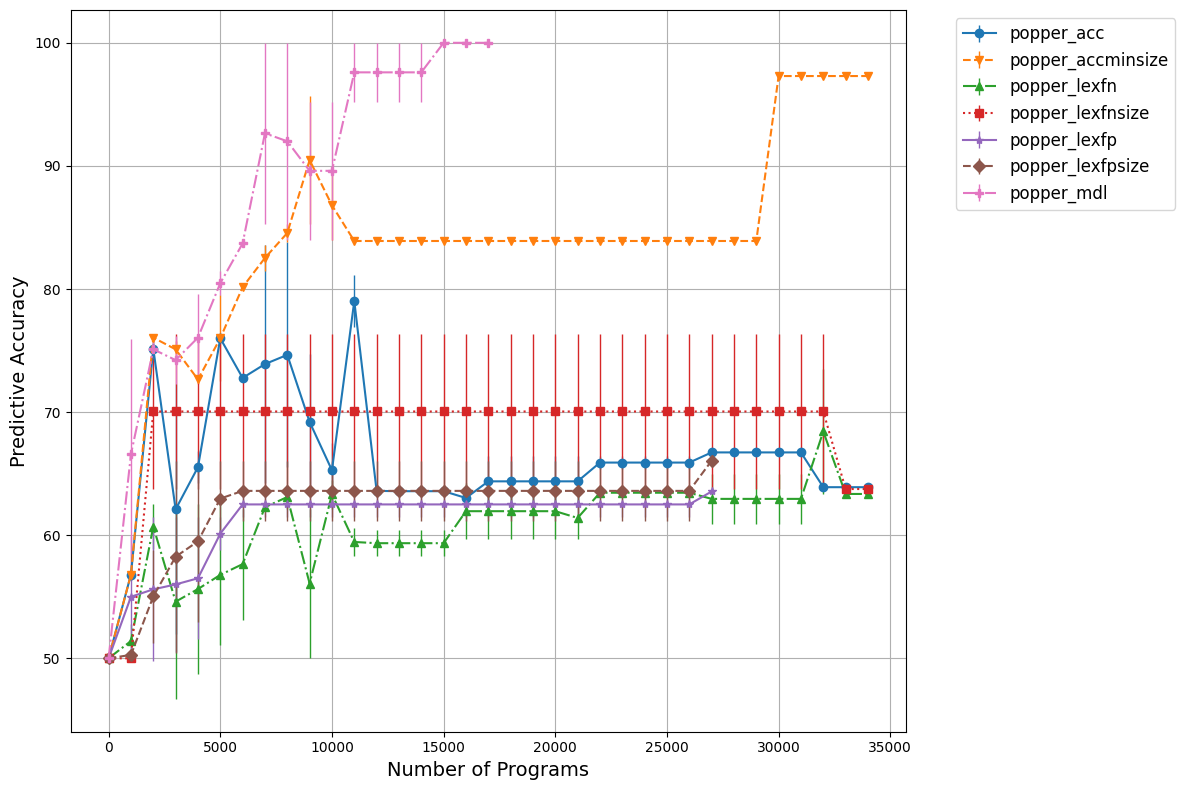

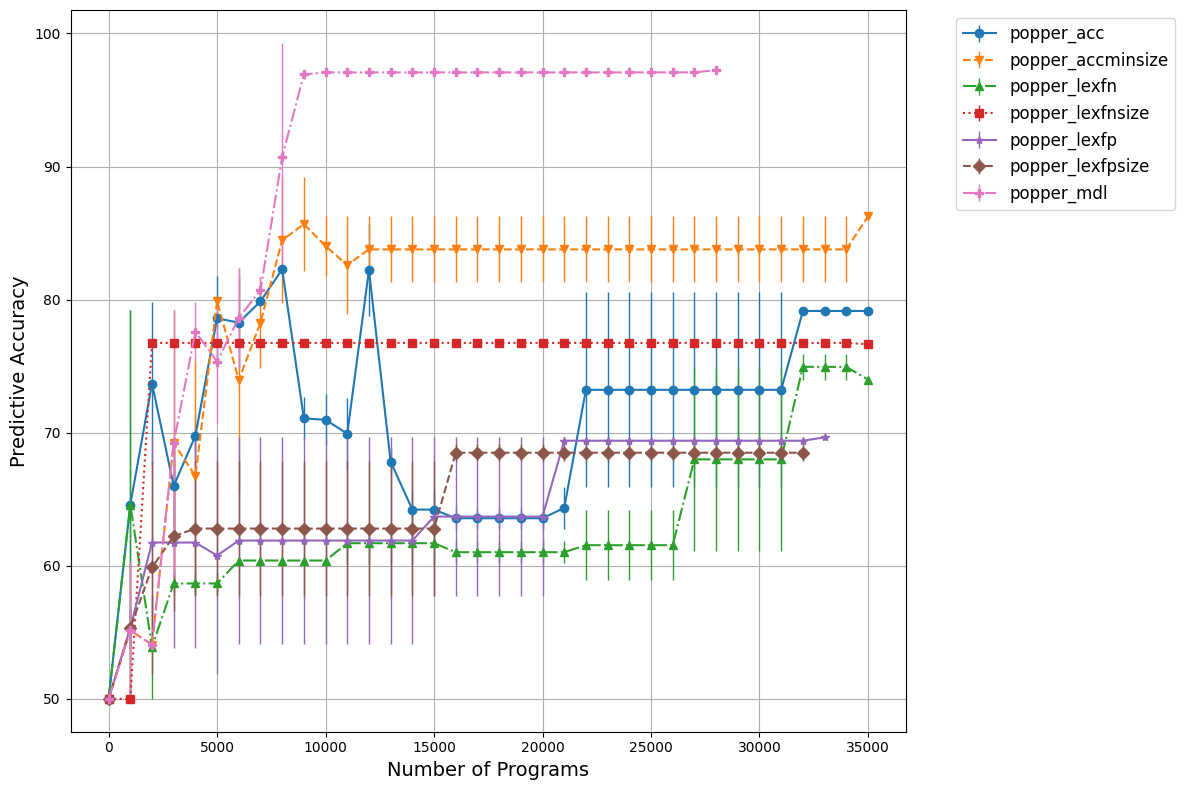

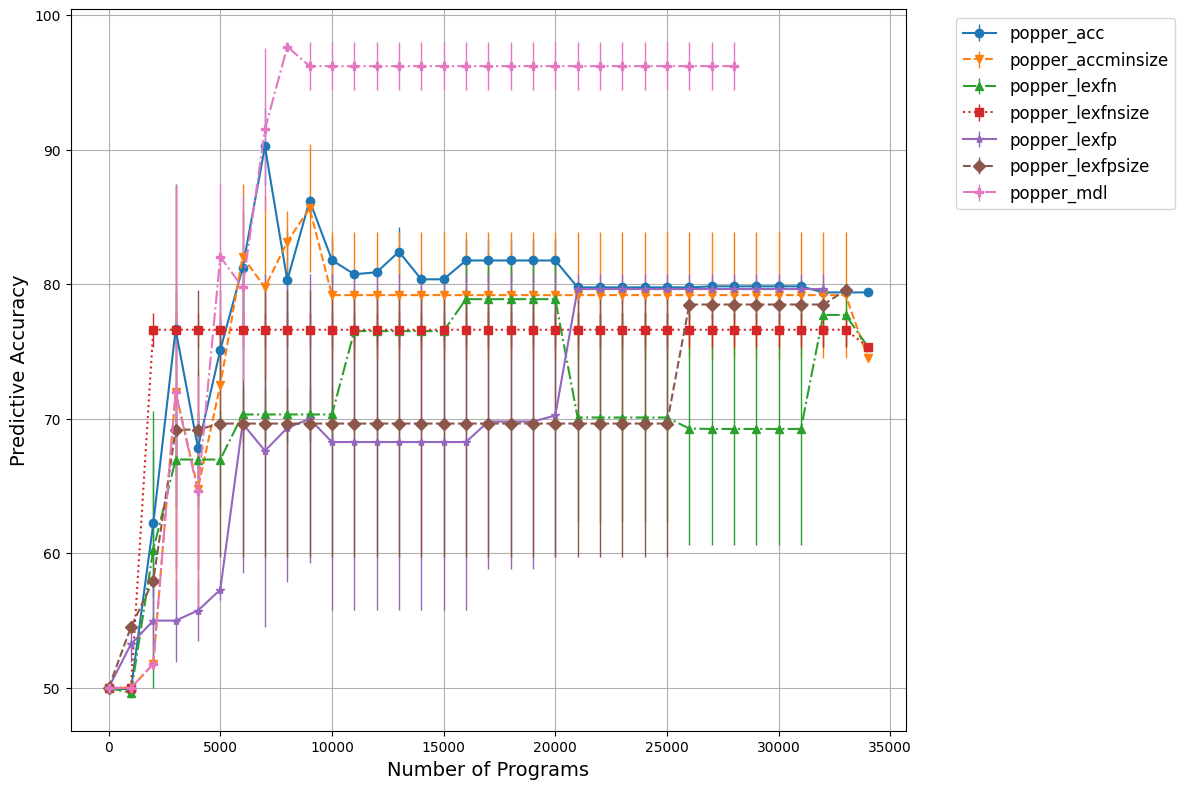

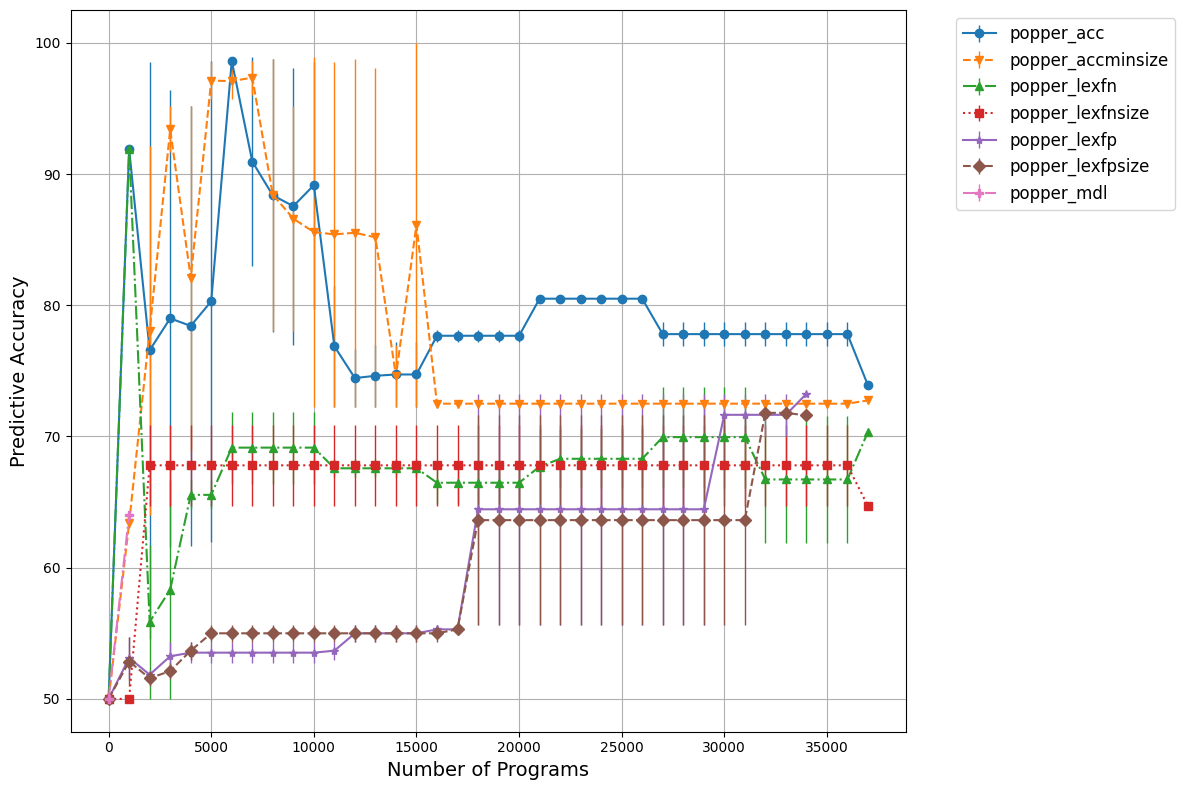

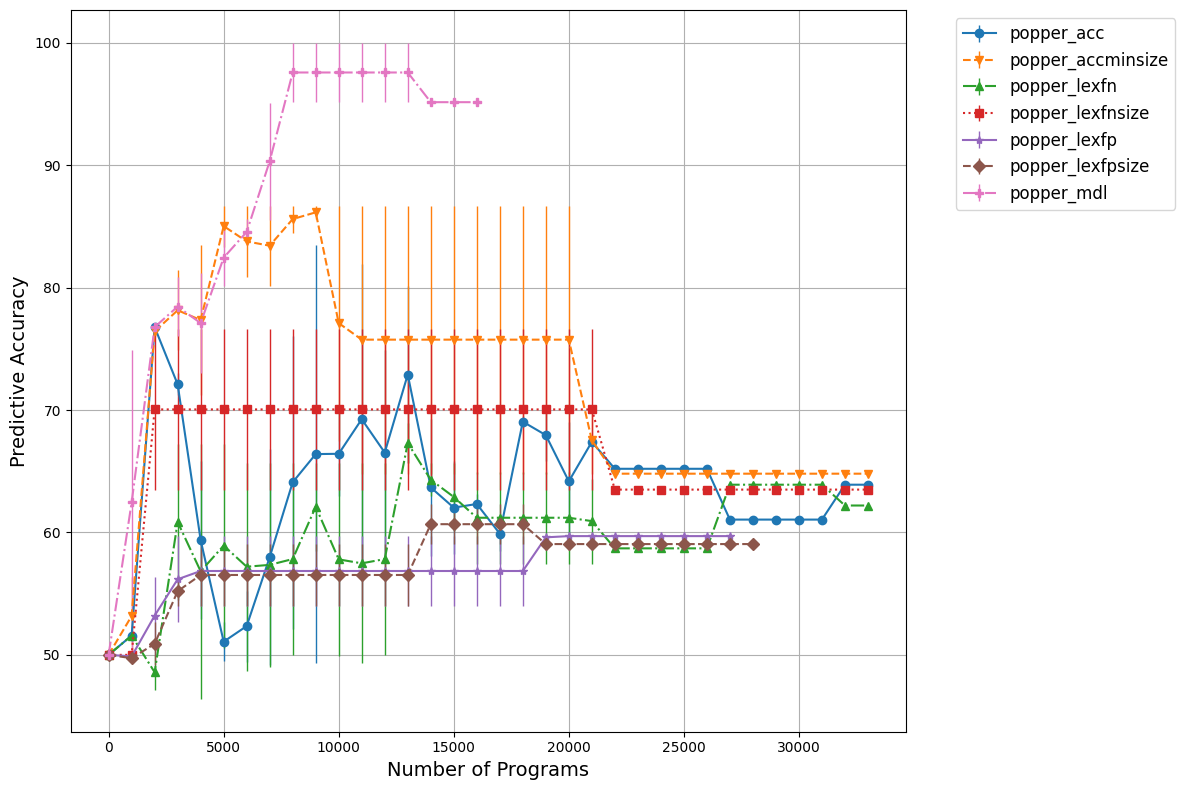

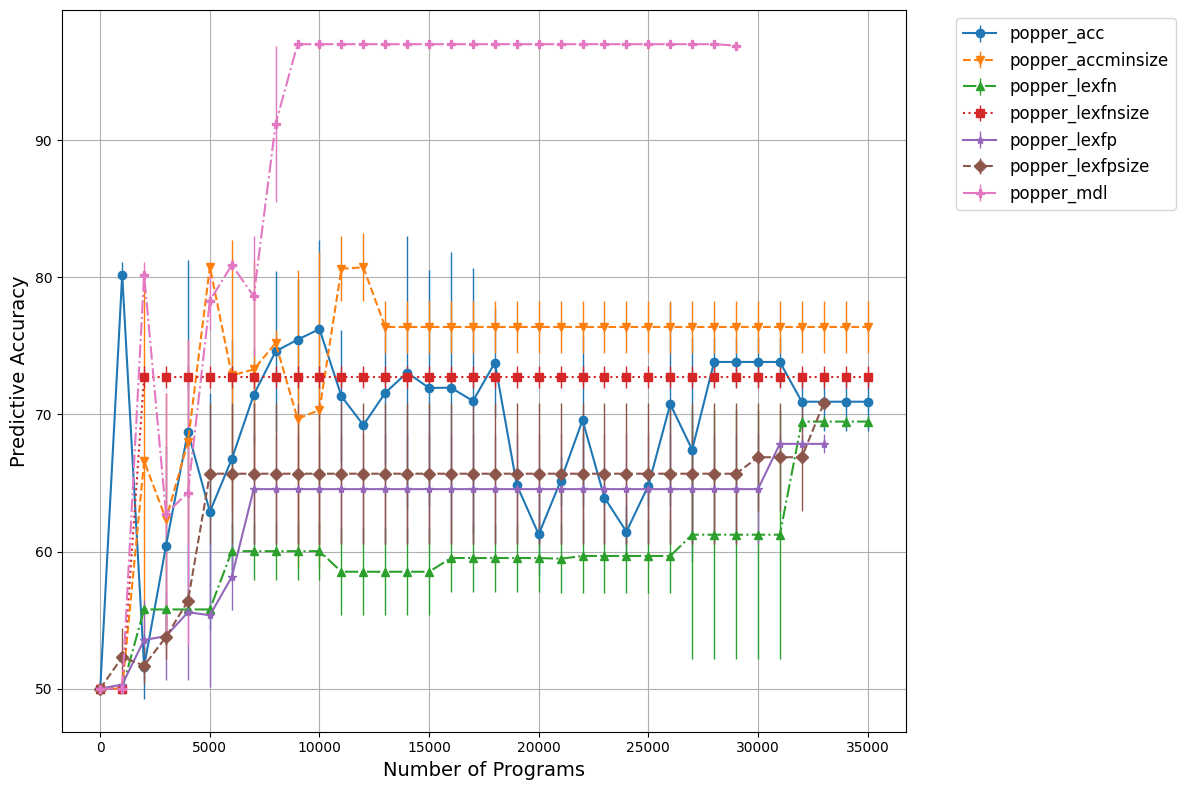

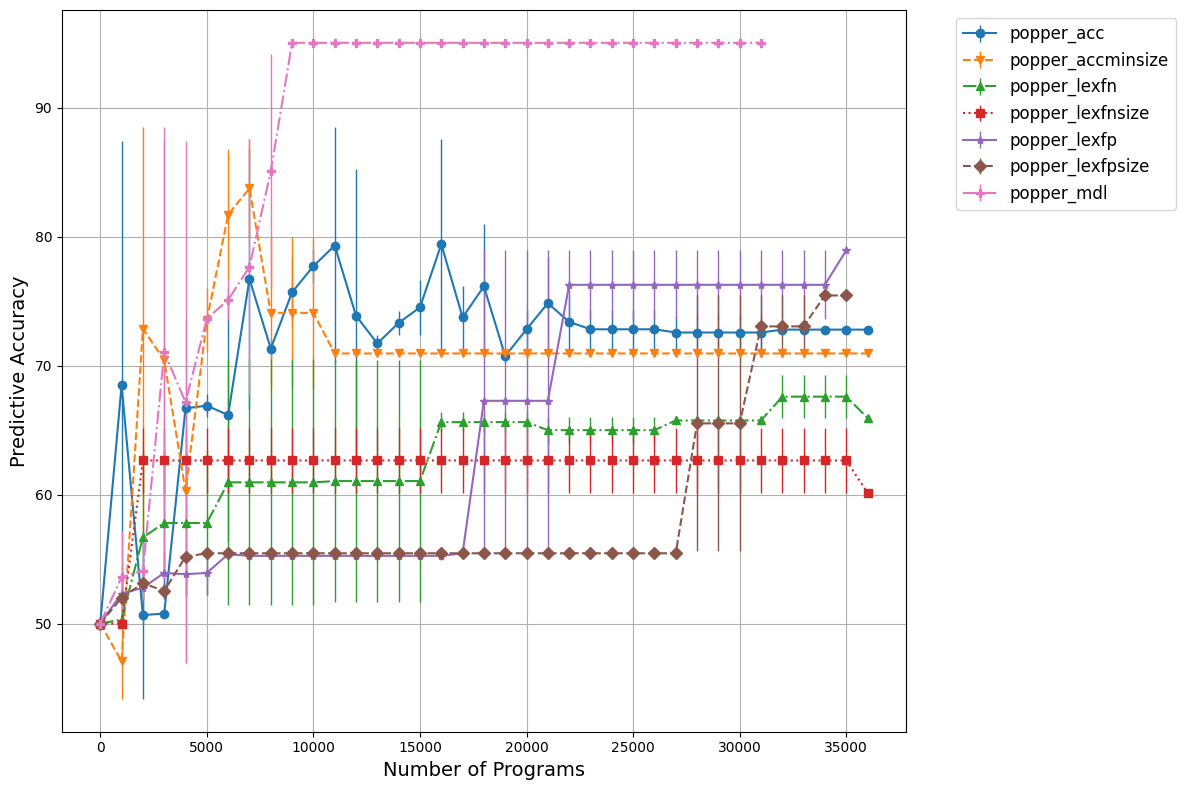

In [ ]:
def plot_results_task(data, task, filename):
    data = data[0]
    markers = ['o', 'v', '^', 's', '*', 'D', 'P', 'X']
    linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':']
    fig, ax = plt.subplots(figsize=(12, 8))

    colors = list(mcolors.TABLEAU_COLORS.keys())
    for i, s in enumerate(SYSTEMS):
        plt.errorbar(
            data[s][task]['timeout'],
            data[s][task]['acc_av'],
            yerr=data[s][task]['acc_sem'],
            elinewidth=1,
            label=f'{s}',
            marker=markers[i % len(markers)],
            linestyle=linestyles[i % len(linestyles)],
            color=colors[i % len(colors)]
        )

    plt.xlabel('Number of Programs', fontsize=14)
    plt.ylabel('Predictive Accuracy', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.grid(True)
    plt.tight_layout()

    # Define the path
    path = "/content/drive/MyDrive/popper/produced_plots"
    if not os.path.exists(path):
        os.makedirs(path)

    # Save the plot
    save_path = os.path.join(path, f'task_{filename}_noise_.png')
    plt.savefig(save_path)
    plt.show()
# Plot for each task
def plot_per_task(data,domain, noise_levels, prefixes):

    for noise_level in noise_levels:
        tasks = [f"{prefix}__{noise_level}" for prefix in prefixes]
        for task in tasks:
          plot_results_task(data, task, f'{task}')

plot_per_task(data_0,'zendo', ['0'], ['zendo1', 'zendo2', 'zendo3', 'zendo4'])
plot_per_task(data_1,'zendo_noise', ['0.1'], ['zendo1', 'zendo2', 'zendo3', 'zendo4'])
plot_per_task(data_2,'zendo_noise', ['0.2'], ['zendo1', 'zendo2', 'zendo3', 'zendo4'])